# Assumptions:
- The underlying asset follows GBM: dS_t = r S_t dt + sigma S_t dW_t
- No dividends are paid.
- The risk-free rate r and volatility sigma are constant.
- Markets are frictionless (no transaction costs, perfect liquidity).
- All options are European-style (exercisable only at maturity).

#Importing Libraries

In [2]:
# Imports and Parameters
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Parameters

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Option and simulation parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
T = 1.0       # Time to maturity (years)
n_steps = 252       # Number of time steps (daily)
n_paths = 10000     # Number of Monte Carlo simulations
dt = T / n_steps    # Time step size

print(f'Parameters: S0={S0}, K={K}, r={r}, sigma={sigma}, T={T}, n_steps={n_steps}, n_paths={n_paths}')

Parameters: S0=100, K=100, r=0.05, sigma=0.2, T=1.0, n_steps=252, n_paths=10000


#GBM using Euler–Maruyama

In [4]:
def simulate_gbm_paths(S0, T, r, sigma, n_steps, n_paths):
    dt = T / n_steps
    S = np.zeros((n_paths, n_steps + 1))
    S[:, 0] = S0

    for t in range(1, n_steps + 1):
        Z = np.random.normal(0, 1, n_paths)
        S[:, t] = S[:, t-1] * (1 + r * dt + sigma * np.sqrt(dt) * Z)
    return S


#Monte Carlo Price

In [5]:
def monte_carlo_price(payoff, r, T):
    return np.exp(-r * T) * np.mean(payoff)

#European Call Option

In [22]:
def european_call_price(S):
    euro_payoff = np.maximum(S[:, -1] - K, 0)
    return monte_carlo_price(euro_payoff, r, T), euro_payoff

# Arithmetic Asian Call Option

In [23]:
def arithmetic_asian_call_price(S):
    avg_price = np.mean(S[:, 1:], axis=1)  # skip S0 if needed
    arith_payoff = np.maximum(avg_price - K, 0)
    return monte_carlo_price(arith_payoff, r, T), arith_payoff

#Geometric Asian Call Option

In [24]:
def geometric_asian_call_price(S):
    log_S = np.log(S[:, 1:])
    geo_mean = np.exp(np.mean(log_S, axis=1))
    geom_payoff = np.maximum(geo_mean - K, 0)
    return monte_carlo_price(geom_payoff, r, T), geom_payoff

# Lookback Call Option

In [25]:
def lookback_floating_call_price(S):
    min_S = np.min(S, axis=1)
    lookback_payoff = np.maximum(S[:, -1] - min_S, 0)
    return monte_carlo_price(lookback_payoff, r, T), lookback_payoff

#Estimate Prices and Payoffs

In [26]:
S_paths = simulate_gbm_paths(S0, T, r, sigma, n_steps, n_paths)

european_price, euro_payoff = european_call_price(S_paths)
arithmetic_asian_price, arith_payoff = arithmetic_asian_call_price(S_paths)
geometric_asian_price, geom_payoff= geometric_asian_call_price(S_paths)
lookback_price,lookback_payoff = lookback_floating_call_price(S_paths)

print(f"European Call Option Price: {european_price:.4f}")
print(f"Arithmetic Asian Option Price: {arithmetic_asian_price:.4f}")
print(f"Geometric Asian Option Price: {geometric_asian_price:.4f}")
print(f"Lookback Floating Strike Option Price: {lookback_price:.4f}")

European Call Option Price: 10.4565
Arithmetic Asian Option Price: 5.7660
Geometric Asian Option Price: 5.5499
Lookback Floating Strike Option Price: 16.6327


#Visualize Sample Paths

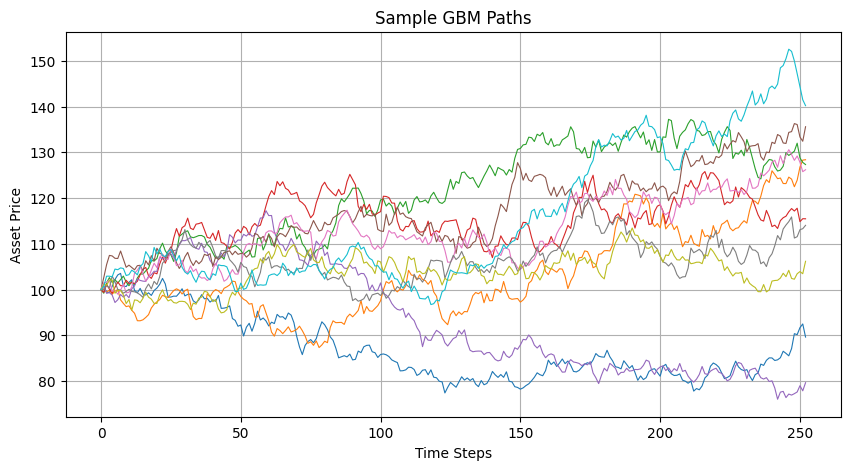

In [19]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(S_paths[i], lw=0.8)
plt.title("Sample GBM Paths")
plt.xlabel("Time Steps")
plt.ylabel("Asset Price")
plt.grid(True)
plt.show()

#Distribution of Option Payoffs

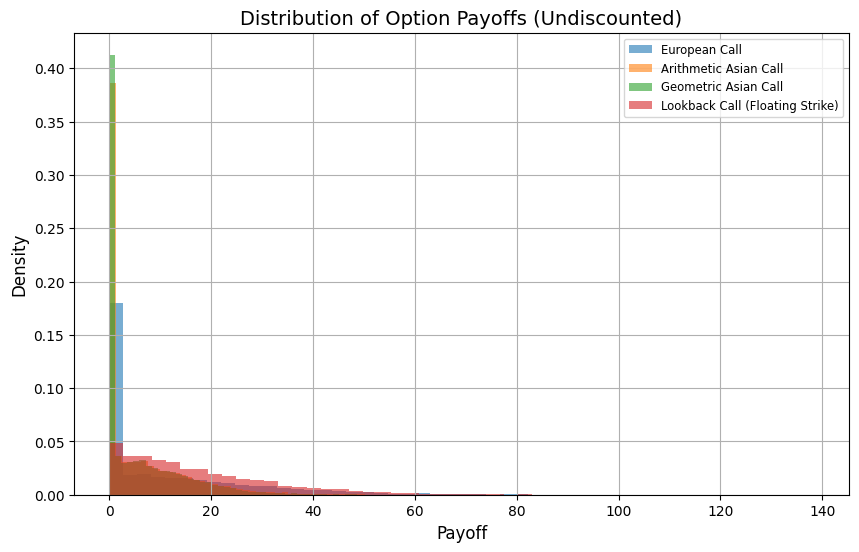

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(euro_payoff, bins=50, alpha=0.6, label='European Call', density=True)
plt.hist(arith_payoff, bins=50, alpha=0.6, label='Arithmetic Asian Call', density=True)
plt.hist(geom_payoff, bins=50, alpha=0.6, label='Geometric Asian Call', density=True)
plt.hist(lookback_payoff, bins=50, alpha=0.6, label='Lookback Call (Floating Strike)', density=True)

plt.title('Distribution of Option Payoffs (Undiscounted)', fontsize=14)
plt.xlabel('Payoff', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)
plt.show()